In [4]:
#!pip3 install optuna
#!pip3 install langdetect
#!pip3 install nltk
#!pip3 install textblob
#!pip3 install spacy==2.3.5
#!pip3 install transformers
#!python3 -m spacy download en_core_web_sm
#!pip3 install xgboost
!pip3 install openpyxl

Defaulting to user installation because normal site-packages is not writeable
  Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [128]:
#!pip3 install spacy==2.3.5

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN, KMeans
from sklearn.svm import SVC
#from keras.models import Sequential
#from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import silhouette_score, accuracy_score, recall_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
#from keras import backend as K 
from unidecode import unidecode
import optuna
pd.set_option('display.max_columns', None)
import warnings 
import re
warnings.filterwarnings('ignore')
from langdetect import detect 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from transformers import pipeline
import spacy
import nltk

nlp_en = spacy.load('en_core_web_sm')
nltk.download('vader_lexicon')
nltk.download('stopwords')
import os
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/aladelca/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aladelca/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [129]:
os.chdir('/Users/aladelca/Library/CloudStorage/OneDrive-McGillUniversity/MMA/Data mining and visualization/group_assignment/repo/INSY_662_MMA')

## Clustering

In [130]:
## Modelling

data_cluster = pd.read_excel('clean_songs_en_fr_sp.xlsx')
data_cluster.head()

,id,name,artist,duration,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,language,Polarity,Subjectivity
0,1hA4856JVAa0qqgKg6olJf,"The Messenger - Live from Las Vegas, 2011",Linkin Park,233280,37,0.325,0.726000,0.409,0.000013,0.1880,-5.711,0.0295,109.001,0.187,en,0.141837,0.752551
1,0GgN4MhR5GKn5IcKN0e0rG,Cancer,My Chemical Romance,142973,72,0.457,0.358000,0.515,0.000000,0.2780,-4.310,0.0261,74.984,0.222,en,-0.067330,0.678125
2,10nyNJ6zNy2YVYLrcwLccB,No Surprises,Radiohead,229120,83,0.255,0.057700,0.393,0.003610,0.1130,-10.654,0.0278,76.426,0.118,en,-0.036364,0.630303
3,7lRlq939cDG4SzWOF4VAnd,I'm Not Okay (I Promise),My Chemical Romance,186480,78,0.210,0.006020,0.940,0.000000,0.2690,-3.427,0.1230,179.722,0.255,en,0.259333,0.536667
4,5u2FOoFhp495GIj5BJC77J,Hold On Till May,Pierce The Veil,278586,66,0.460,0.000585,0.910,0.001550,0.0735,-3.710,0.0525,73.019,0.327,en,0.177059,0.499412


In [176]:
### Standarization

CLUSTER_VARS = ['liveness','acousticness','energy','instrumentalness','loudness','speechiness','tempo','duration','danceability']

esc = StandardScaler()

data_esc = esc.fit_transform(data_cluster[CLUSTER_VARS])




In [61]:
### Clustering

inertias = []
silhouettes = []
for i in np.arange(2,21):
    model = KMeans(n_clusters=i)
    model.fit(data_esc)
    inertias.append(model.inertia_)
    silhouettes.append(silhouette_score(data_esc, model.labels_))
    #data['cluster_kmeans'] = model.labels_

In [ ]:
sns.lineplot(x = np.arange(2,21), y = np.array(inertias))

In [ ]:
sns.lineplot(x = np.arange(2,21), y = silhouettes)

In [132]:
### Number of clusters 

n = 6

model_clustering = KMeans(n_clusters=6)
model_clustering.fit(data_esc)
#data['kmeans_cluster'] = model_clustering.labels_

KMeans(n_clusters=6)

In [ ]:
for i in CLUSTER_VARS:
    sns.boxplot(y = data[i], x = data['kmeans_cluster'])
    plt.show()

In [ ]:
### Songs

data[data['kmeans_cluster']==5]

## Predicting song's mood

In [134]:
data = pd.read_excel('clean_songs_en_fr_sp.xlsx')
data.head()

,id,name,artist,duration,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,language,Polarity,Subjectivity
0,1hA4856JVAa0qqgKg6olJf,"The Messenger - Live from Las Vegas, 2011",Linkin Park,233280,37,0.325,0.726000,0.409,0.000013,0.1880,-5.711,0.0295,109.001,0.187,en,0.141837,0.752551
1,0GgN4MhR5GKn5IcKN0e0rG,Cancer,My Chemical Romance,142973,72,0.457,0.358000,0.515,0.000000,0.2780,-4.310,0.0261,74.984,0.222,en,-0.067330,0.678125
2,10nyNJ6zNy2YVYLrcwLccB,No Surprises,Radiohead,229120,83,0.255,0.057700,0.393,0.003610,0.1130,-10.654,0.0278,76.426,0.118,en,-0.036364,0.630303
3,7lRlq939cDG4SzWOF4VAnd,I'm Not Okay (I Promise),My Chemical Romance,186480,78,0.210,0.006020,0.940,0.000000,0.2690,-3.427,0.1230,179.722,0.255,en,0.259333,0.536667
4,5u2FOoFhp495GIj5BJC77J,Hold On Till May,Pierce The Veil,278586,66,0.460,0.000585,0.910,0.001550,0.0735,-3.710,0.0525,73.019,0.327,en,0.177059,0.499412


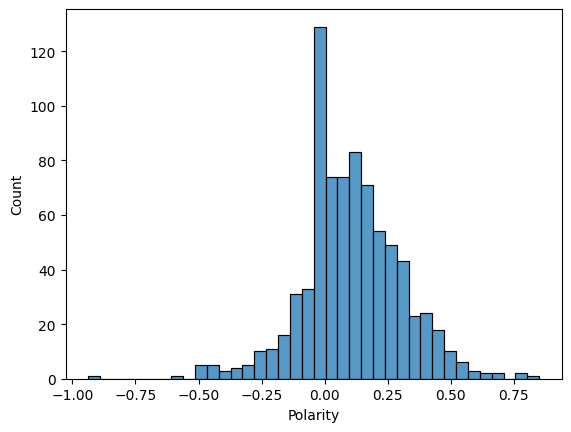

0.85


,id,name,artist,duration,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,language,Polarity,Subjectivity
401,2IhTNWQ9sFAr4WsfDpIy4s,Inseparable,Natalie Cole,149106,0,0.443,0.8550,0.194,0.000125,0.1800,-12.644,0.0366,125.145,0.258,en,0.80,0.833333
462,5M4yti0QxgqJieUYaEXcpw,Eventually,Tame Impala,318591,78,0.424,0.0158,0.615,0.000389,0.0844,-6.217,0.0325,77.935,0.155,en,0.80,1.000000
633,4Jn1rVpnfFfpuSBLDTNJv8,Proclamation,Gentle Giant,416866,39,0.514,0.1110,0.427,0.008120,0.1270,-14.254,0.0717,115.120,0.371,en,0.85,0.600000


In [135]:
sns.histplot(data['Polarity'])
plt.show()
print(data['Polarity'].max())

data[data['Polarity']>0.70]

In [136]:
## Creating dependent variables

bins = pd.IntervalIndex.from_tuples([
    (-1, -0.67),
    (-0.67, -0.34),
    (-0.34, 0),
    (0, 0.33),
    (0.33, 0.66),
    (0.66, 1)
])
n = len(bins)
data['sentiment'] = pd.cut(data['Polarity'],bins)
labels = ['depressed','melancholic','mellow','hopeful','joyful','over the moon']
mapping = {}
for i in range(6):
    mapping[data['sentiment'].unique()[i]] = labels[i]
#data['sentiment'] = data['sentiment'].map(mapping)

codes = {}
for i in range(6):
    codes[labels[i]] = i
#data['sentiment'] = data['sentiment'].map(codes)

In [137]:
enc = OrdinalEncoder()
data['sentiment'] = enc.fit_transform(data[['sentiment']])[:,0]
data = data.drop(['language'], axis = 1)
data['sentiment'].unique()

array([3., 2., 4., 5., 1., 0.])

In [138]:
original_data = pd.read_excel('data/dataset.xlsx')

delete_text_before_lyrics = lambda x: x[x.find("Lyrics") + len("Lyrics"):] if x.find("Lyrics") != -1 else x

original_data['lyrics'] = original_data['lyrics'].apply(delete_text_before_lyrics)

original_data['language'] = original_data['lyrics'].apply(detect)  # Detect the language

original_data.head()

,Unnamed: 0,id,name,artist,disc,duration,episode,explicit,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,time_signature,valence,lyrics,language
0,0,1hA4856JVAa0qqgKg6olJf,"The Messenger - Live from Las Vegas, 2011",Linkin Park,1,233280,False,False,37,0.325,0.726000,0.409,0.000013,0.1880,-5.711,1,0.0295,109.001,4,0.187,"When you feel you're alone, cut off from this ...",en
1,1,0GgN4MhR5GKn5IcKN0e0rG,Cancer,My Chemical Romance,1,142973,False,False,72,0.457,0.358000,0.515,0.000000,0.2780,-4.310,1,0.0261,74.984,4,0.222,"\nTurn away\nIf you could, get me a drink\nOf ...",en
2,2,10nyNJ6zNy2YVYLrcwLccB,No Surprises,Radiohead,1,229120,False,False,83,0.255,0.057700,0.393,0.003610,0.1130,-10.654,1,0.0278,76.426,4,0.118,\nA heart that's full up like a landfill\nA jo...,en
3,3,7lRlq939cDG4SzWOF4VAnd,I'm Not Okay (I Promise),My Chemical Romance,1,186480,False,True,78,0.210,0.006020,0.940,0.000000,0.2690,-3.427,1,0.1230,179.722,4,0.255,"\n\nWell, if you wanted honesty\nThat's all yo...",en
4,4,5u2FOoFhp495GIj5BJC77J,Hold On Till May,Pierce The Veil,1,278586,False,False,66,0.460,0.000585,0.910,0.001550,0.0735,-3.710,1,0.0525,73.019,4,0.327,"\nShe sits up high, surrounded by the sun\nOne...",en


In [139]:
data_pre = data.merge(original_data[['id','lyrics','language']], how = 'left', on = ['id'])
data_pre = data_pre.drop_duplicates()

data_pre = data_pre[data_pre['language'].isin(['es','en','fr'])]

data_pre['lyrics'] = data_pre['lyrics'].astype(str).str.lower()
data_pre['lyrics'] = data_pre['lyrics'].apply(unidecode)
regexp = RegexpTokenizer('\w+')

data_pre['lyrics_token'] = data_pre['lyrics'].apply(regexp.tokenize)
data_pre.head()

,id,name,artist,duration,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,Polarity,Subjectivity,sentiment,lyrics,language,lyrics_token
0,1hA4856JVAa0qqgKg6olJf,"The Messenger - Live from Las Vegas, 2011",Linkin Park,233280,37,0.325,0.726000,0.409,0.000013,0.1880,-5.711,0.0295,109.001,0.187,0.141837,0.752551,3.0,"when you feel you're alone, cut off from this ...",en,"[when, you, feel, you, re, alone, cut, off, fr..."
2,0GgN4MhR5GKn5IcKN0e0rG,Cancer,My Chemical Romance,142973,72,0.457,0.358000,0.515,0.000000,0.2780,-4.310,0.0261,74.984,0.222,-0.067330,0.678125,2.0,"\nturn away\nif you could, get me a drink\nof ...",en,"[turn, away, if, you, could, get, me, a, drink..."
4,10nyNJ6zNy2YVYLrcwLccB,No Surprises,Radiohead,229120,83,0.255,0.057700,0.393,0.003610,0.1130,-10.654,0.0278,76.426,0.118,-0.036364,0.630303,2.0,\na heart that's full up like a landfill\na jo...,en,"[a, heart, that, s, full, up, like, a, landfil..."
6,7lRlq939cDG4SzWOF4VAnd,I'm Not Okay (I Promise),My Chemical Romance,186480,78,0.210,0.006020,0.940,0.000000,0.2690,-3.427,0.1230,179.722,0.255,0.259333,0.536667,3.0,"\n\nwell, if you wanted honesty\nthat's all yo...",en,"[well, if, you, wanted, honesty, that, s, all,..."
8,5u2FOoFhp495GIj5BJC77J,Hold On Till May,Pierce The Veil,278586,66,0.460,0.000585,0.910,0.001550,0.0735,-3.710,0.0525,73.019,0.327,0.177059,0.499412,3.0,"\nshe sits up high, surrounded by the sun\none...",en,"[she, sits, up, high, surrounded, by, the, sun..."


In [140]:

def tokenizing(data):
    stopwords_en = nltk.corpus.stopwords.words("english")
    stopwords_es = nltk.corpus.stopwords.words("spanish")
    stopwords_fr = nltk.corpus.stopwords.words("french")
    data_en = data[data['language']=='en']
    data_en['lyrics_token'] = data_en['lyrics_token'].apply(lambda x: [item for item in x if item not in stopwords_en])
    data_es = data[data['language']=='es']
    data_es['lyrics_token'] = data_es['lyrics_token'].apply(lambda x: [item for item in x if item not in stopwords_es])
    data_fr = data[data['language']=='fr']
    data_fr['lyrics_token'] = data_fr['lyrics_token'].apply(lambda x: [item for item in x if item not in stopwords_fr])
    final = pd.concat([data_en,data_es, data_fr], axis = 0)
    return final

In [141]:
data_token = tokenizing(data_pre)

lemmatizer = WordNetLemmatizer()
data_token['lyrics_token'] = data_token['lyrics_token'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
data_token['lyrics'] = data_token['lyrics_token'].apply(lambda x: ' '.join([item for item in x]))

pattern = r'[0-9]'

# Match all digits in the string and replace them with an empty string
def replace_numbers(x):
    new_string = re.sub(pattern, '', x)
    return new_string
data_token['lyrics'] = data_token['lyrics'].apply(replace_numbers)
data_token.head()

,id,name,artist,duration,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,Polarity,Subjectivity,sentiment,lyrics,language,lyrics_token
0,1hA4856JVAa0qqgKg6olJf,"The Messenger - Live from Las Vegas, 2011",Linkin Park,233280,37,0.325,0.726000,0.409,0.000013,0.1880,-5.711,0.0295,109.001,0.187,0.141837,0.752551,3.0,feel alone cut cruel world instinct telling ru...,en,"[feel, alone, cut, cruel, world, instinct, tel..."
2,0GgN4MhR5GKn5IcKN0e0rG,Cancer,My Chemical Romance,142973,72,0.457,0.358000,0.515,0.000000,0.2780,-4.310,0.0261,74.984,0.222,-0.067330,0.678125,2.0,turn away could get drink water cause lip chap...,en,"[turn, away, could, get, drink, water, cause, ..."
4,10nyNJ6zNy2YVYLrcwLccB,No Surprises,Radiohead,229120,83,0.255,0.057700,0.393,0.003610,0.1130,-10.654,0.0278,76.426,0.118,-0.036364,0.630303,2.0,heart full like landfill job slowly kill bruis...,en,"[heart, full, like, landfill, job, slowly, kil..."
6,7lRlq939cDG4SzWOF4VAnd,I'm Not Okay (I Promise),My Chemical Romance,186480,78,0.210,0.006020,0.940,0.000000,0.2690,-3.427,0.1230,179.722,0.255,0.259333,0.536667,3.0,well wanted honesty say never want let go bett...,en,"[well, wanted, honesty, say, never, want, let,..."
8,5u2FOoFhp495GIj5BJC77J,Hold On Till May,Pierce The Veil,278586,66,0.460,0.000585,0.910,0.001550,0.0735,-3.710,0.0525,73.019,0.327,0.177059,0.499412,3.0,sits high surrounded sun one million branch lo...,en,"[sits, high, surrounded, sun, one, million, br..."


In [142]:
data_token[data_token['sentiment']==5]['Polarity']

46     0.688462
117    0.700000
425    0.800000
486    0.800000
657    0.850000
Name: Polarity, dtype: float64

In [143]:
VARS = ['artist','duration','danceability','acousticness','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence','language','lyrics']
FINAL_VARS = ['name','artist','duration','danceability','acousticness','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence','language','lyrics']
TARGET = ['sentiment']

x = data_token[VARS]
y = data_token[TARGET]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)
y_train = np.array(y_train, dtype=int) 
y_test = np.array(y_test, dtype=int) 
x_train = x_train.rename(columns = {'artist':'artist_song','language':'lang'})
x_test = x_test.rename(columns = {'artist':'artist_song','language':'lang'})

In [144]:
#### Handling text

vect = TfidfVectorizer(max_features = 1000,ngram_range=(1,3))
x_train_lyrics = pd.DataFrame(vect.fit_transform(x_train['lyrics']).toarray(), columns  = vect.get_feature_names_out(), index = x_train.index)
x_test_lyrics = pd.DataFrame(vect.transform(x_test['lyrics']).toarray(), columns  = vect.get_feature_names_out(), index = x_test.index)

x_train_final = pd.concat([x_train, x_train_lyrics], axis = 1)
x_test_final = pd.concat([x_test, x_test_lyrics], axis = 1)



In [145]:
EXCLUDED_VARS = ['lyrics']
x_train_df = x_train_final.loc[:,~x_train_final.columns.isin(EXCLUDED_VARS)]
x_test_df = x_test_final.loc[:,~x_test_final.columns.isin(EXCLUDED_VARS)]
x_train_df.head()

,artist_song,duration,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,lang,able,across,act,actually,afraid,age,ah,ah ah,ah ah ah,air,alabama,alan,album,almost,alone,along,already,alright,also,also like,also likeembed,always,america,american,among,amor,angel,angela,another,answer,anyone,anything,ap,apart,appeared,april,april th,arm,around,art,artist,aseptember,asi,ask,asked,attention,august,away,away give,away give away,ay,ba,ba ba,ba ba ba,baby,back,bad,bag,ball,band,bank,bar,battle,beach,beat,beatles,beautiful,beauty,bebe,became,become,bed,begala,began,begin,behind,believe,bell,best,better,beyond,bien,big,bill,bird,bit,bitch,black,blood,bloody,bloom,blow,blue,bob,body,bone,book,born,bout,box,boy,brain,break,breath,bridge,bright,bring,broke,broken,brother,brought,brown,business,buy,bye,ca,caesar,call,call call,called,calling,came,camp,cannot,captain,car,cara,care,carlson,carti,case,cash,cat,catch,cause,certain,chair,chance,change,child,chorus,chris,city,clarence,class,clean,clear,cliff,close,clothes,club,coffee,cold,color,come,coming,comme,common,company,control,cool,corner,could,country,country singer,couple,course,court,cover,crazy,cried,crosstalk,crowd,cry,cut,da,da da,da da da,dad,daddy,damn,dan,dance,dancing,dark,darling,daughter,david,day,de,dead,deal,dear,death,december,decent,decent strong,deep,demo,desire,diamond,dick,die,died,dientes,different,dirty,disco,dj,do,doctor,dog,done,door,doubt,dr,drake,dream,dress,drink,drive,drop,dude,dum,ear,early,earn,earth,easy,eat,eh,eh eh,either,el,element,elliot,else,em,embed,end,english,english translation,enough,ep,er,ere,etait,etre,even,evening,ever,every,everybody,everyone,everything,ey,eye,face,fact,fair,fait,fall,falling,family,famous,far,fast,father,fear,feat,feat joel,feat joel sattler,featuring,february,february th,feel,feeling,fell,fellow,felt,field,fight,figure,finally,find,fine,finger,fire,first,five,flame,floor,flow,flower,fly,food,fool,foot,force,forever,forget,form,forth,forward,found,four,free,freedom,french,fresh,friday,friend,front,ft,fuck,fuckin,full,fun,future,game,garden,gatsby,gave,general,gentleman,get,getting,ghost,giant,gillis,girl,give,give away,give away give,given,glass,go,god,going,gold,golden,gone,gonna,good,goodbye,got,gotta,grand,great,greatest,green,ground,group,guess,gun,gusta,guy,hail,hair,half,hall,hand,happen,happy,hard,hat,hate,hath,head,hear,heard,heart,heaven,heavy,held,hell,hello,help,hey,high,hill,hip,hip hop,history,hit,hold,holding,hole,home,hop,hope,horror,horse,hot,hotel,hour,house,however,human,hundred,hurt,ice,idea,ii,indeed,industry,infinity,inside,instead,jack,james,january,january st,january th,jay,jazz,jesus,jimmy,job,joe,joel,joel sattler,john,jordan,joy,july,july th,june,kanye,kanye west,keep,kendrick,kendrick lamar,key,kid,kill,kind,king,kiss,knee,knew,know,known,la,la la,la la la,lady,lamar,land,language,large,last,late,later,laugh,laughter,lawrence,lay,le,lead,leaf,learned,least,leave,leaving,led,left,leg,let,let go,letter,li,lie,life,light,light decent,like,likeembed,lil,line,lip,listen,little,live,liveget,liveget ticket,liveget ticket low,living,lonely,long,longer,look,look like,looked,looking,lord,lose,lost,lot,loud,love,love love,love love love,loved,lovely,lover,low,low you,low you might,lucky,lyric,ma,mac,macbeth,machine,mad,made,magic,main,make,making,malachy,mami,man,manner,many,march,march th,marianela,marianela marianela,marianela marianela marianela,mark,master,matter,max,may,may th,maybe,mean,meant,meet,meme,memory,men,met,mi,michael,middle,midnight,might,might also,might also like,might also likeembed,million,mind,mine,minute,miranda,miss,modern,moment,money,monster,month,moon,morel,morning,mother,motion,mouth,move,movement,mr,mr bloom,much,music,must,na,na na,na na na,name,named,nature,nd,near,need,negro,never,new,new york,news,next,nice,nigga,night,nobody,noche,norma,north,note,nothing,november,number,object,ocean,october,office,oh,oh oh,oh oh oh,oh yeah,okay,old,one

In [146]:
### Modeling
params = {'iterations': 1786, 'depth': 9, 'learning_rate': 0.29666741441737854}
CAT_VARS = ['artist_song','lang']
x_train_df[CAT_VARS] = x_train_df[CAT_VARS].astype('category')
x_test_df[CAT_VARS] = x_test_df[CAT_VARS].astype('category')
model = CatBoostClassifier(cat_features=CAT_VARS, **params, random_state = 123)
model_lgbm = lgb.LGBMClassifier(categorical_feature = CAT_VARS, random_state = 123)
model_xgb = XGBClassifier(enable_categorical=True, random_state = 123)
model_rf = RandomForestClassifier(random_state=123)
model_xgb.fit(x_train_df, y_train)
model_lgbm.fit(x_train_df, y_train)
model.fit(x_train_df, y_train)
model_rf.fit(x_train_df.loc[:,~x_train_df.columns.isin(CAT_VARS)], y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] categorical_feature is set=artist_song,lang, categorical_column=0,11 will be ignored. Current value: categorical_feature=artist_song,lang
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.035364 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18829
[LightGBM] [Info] Number of data points in the train set: 594, number of used features: 847
[LightGBM] [Info] Start training from score -6.386879
[LightGBM] [Info] Start training from score -3.747822
[LightGBM] [Info] Start training from score -1.262915
[LightGBM] [Info] Start training from score -0.581744
[LightGBM] [Info] Start training from score -2.069391
[LightGBM] [Info] Start training from score -5.000585
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

RandomForestClassifier(random_state=123)

In [147]:
esc_nn = StandardScaler()
x_train_esc = esc_nn.fit_transform(x_train_df.loc[:,~x_train_df.columns.isin(CAT_VARS)])
x_test_esc = esc_nn.transform(x_test_df.loc[:,~x_test_df.columns.isin(CAT_VARS)])
model_nn = MLPClassifier()
model_nn.fit(x_train_esc, y_train)


MLPClassifier()

In [148]:
preds_catboost = model.predict(x_test_df)
preds_probas_catboost = model.predict_proba(x_test_df)
preds_probas_train_catboost = model.predict_proba(x_train_df)

preds_lgbm = model_lgbm.predict(x_test_df)
preds_probas_lgbm = model_lgbm.predict_proba(x_test_df)
preds_probas_train_lgbm = model_lgbm.predict_proba(x_train_df)

preds_xgb = model_xgb.predict(x_test_df)
preds_probas_xgb = model_xgb.predict_proba(x_test_df)
preds_probas_train_xgb = model_xgb.predict_proba(x_train_df)

preds_rf = model_rf.predict(x_test_df.loc[:,~x_test_df.columns.isin(CAT_VARS)])
preds_probas_rf = model_rf.predict_proba(x_test_df.loc[:,~x_test_df.columns.isin(CAT_VARS)])
preds_probas_train_rf = model_rf.predict_proba(x_train_df.loc[:,~x_train_df.columns.isin(CAT_VARS)])

preds_nn  = model_nn.predict(x_test_esc)
preds_probas_nn  = model_nn.predict_proba(x_test_esc)
preds_probas_train_rf = model_nn.predict_proba(x_train_esc)

print(accuracy_score(preds_catboost, y_test))
print(accuracy_score(preds_lgbm, y_test))
print(accuracy_score(preds_xgb, y_test))
print(accuracy_score(preds_rf, y_test))
print(accuracy_score(preds_nn, y_test))

0.6733668341708543
0.7085427135678392
0.6683417085427136
0.6381909547738693
0.5879396984924623


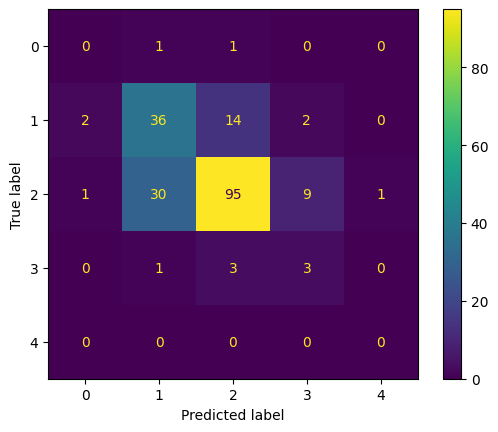

In [149]:
cm_catboost = confusion_matrix(preds_catboost, y_test)
disp = ConfusionMatrixDisplay(cm_catboost)
disp.plot()
plt.show()

In [170]:
## Stacked model


df_probas_train = pd.concat([pd.DataFrame(preds_probas_train_catboost, columns = [f'catboost_{i}' for i in range(6)]),
pd.DataFrame(preds_probas_train_lgbm, columns = [f'lgbm_{i}' for i in range(6)]),
pd.DataFrame(preds_probas_train_xgb, columns = [f'xgb_{i}' for i in range(6)]),
pd.DataFrame(preds_probas_train_rf, columns = [f'rf_{i}' for i in range(6)])], axis = 1)

df_probas_test = pd.concat([pd.DataFrame(preds_probas_catboost, columns = [f'catboost_{i}' for i in range(6)]),
pd.DataFrame(preds_probas_lgbm, columns = [f'lgbm_{i}' for i in range(6)]),
pd.DataFrame(preds_probas_xgb, columns = [f'xgb_{i}' for i in range(6)]),
pd.DataFrame(preds_probas_rf, columns = [f'rf_{i}' for i in range(6)])], axis = 1)

linear_model = LogisticRegression(penalty='l2', solver = 'saga', C = 0.05)
nn_ensamble = MLPClassifier(random_state=123)
nn_ensamble.fit(df_probas_train, y_train)
preds = nn_ensamble.predict(df_probas_test)
accuracy_score(preds, y_test)


0.6884422110552764

In [ ]:
def objective_xgb(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.00001, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 4000),
        # Add other hyperparameters as needed
    }

    model = XGBClassifier(enable_categorical=True, *params)
    model.fit(x_train_df, y_train)
    predictions = model.predict(x_test_df)
    accuracy = accuracy_score(predictions, y_test)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective_xgb, n_trials=40)

In [ ]:
def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 50, 4000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.0001, 0.3),

        # Add other hyperparameters as needed
    }

    model = CatBoostClassifier(**params, silent=True, cat_features=CAT_VARS)
    model.fit(x_train_df, y_train)
    predictions = model.predict(x_test_df)
    accuracy = accuracy_score(predictions, y_test)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=40)

In [ ]:
params = {'iterations': 1786, 'depth': 9, 'learning_rate': 0.29666741441737854}
model = CatBoostClassifier(cat_features=CAT_VARS, **params)
model.fit(x_train_df, y_train)
preds_catboost = model.predict(x_test_df)
print(accuracy_score(preds_catboost, y_test))

In [163]:
#### Recommendation system




def analyze_sentiment(text, language_model):
    doc = language_model(text)
    text = " ".join([token.lemma_ for token in doc if not token.is_stop])

    blob = TextBlob(text)
    
    return blob.sentiment




In [164]:
def text_preprocess(text):
    ## Language detection
    lang = detect(text)
    print(lang)
    ## Replace numbers
    text = replace_numbers(text)
    ## Replacing characters
    text = text.lower()
    text = unidecode(text)
    ## Tokenization
    if lang in ['en','es','fr']:
        tokens = regexp.tokenize(text)

    
    ## Stop words
    stopwords_en = nltk.corpus.stopwords.words("english")
    stopwords_es = nltk.corpus.stopwords.words("spanish")
    stopwords_fr = nltk.corpus.stopwords.words("french")
    if lang == 'en':
        new_tokens = [i for i in tokens if i not in stopwords_en]
    elif lang == 'es':
        new_tokens = [i for i in tokens if i not in stopwords_es]
    elif lang == 'fr':
        new_tokens = [i for i in tokens if i not in stopwords_fr]
    ## Join text

    full_text = ' '.join(new_tokens)
    
    return full_text



In [165]:
text_preprocess('hola que tal como te va')

es


'hola tal va'

In [166]:
def predict(dataset, original_data, enc, model, model_cluster, escal ):
    
    #dataset = dataset.drop(['language'], axis = 1)
    original_data['lyrics'] = original_data['lyrics'].apply(delete_text_before_lyrics)

    #original_data['language'] = original_data['lyrics'].apply(detect) 
    data_pre = dataset.merge(original_data[['id','lyrics','language']], how = 'left', on = ['id'])
    data_pre = data_pre.drop_duplicates()
    print(data_pre)
    data_pre = data_pre[FINAL_VARS]
    data_pre = data_pre[data_pre['language'].isin(['es','en','fr'])]

    data_pre['lyrics'] = data_pre['lyrics'].astype(str).str.lower()
    data_pre['lyrics'] = data_pre['lyrics'].apply(unidecode)

    data_pre['lyrics_token'] = data_pre['lyrics'].apply(regexp.tokenize)
    data_token = tokenizing(data_pre)
    data_token['lyrics_token'] = data_token['lyrics_token'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
    data_token['lyrics'] = data_token['lyrics_token'].apply(lambda x: ' '.join([item for item in x]))
    data_token['lyrics'] = data_token['lyrics'].apply(replace_numbers)
    data_token = data_token.rename(columns = {'artist':'artist_song','language':'lang'})
    data_token = data_token.drop(['lyrics_token'], axis = 1)
    songs_name = data_token['name'].values
    data_token = data_token.drop(['name'], axis = 1)
    df_text = pd.DataFrame(enc.transform(data_token['lyrics']).toarray(), columns  = enc.get_feature_names_out(), index = data_token.index)

    df_final = pd.concat([data_token, df_text], axis = 1)
    
    df_final_no_lyrics = df_final.loc[:,~df_final.columns.isin(EXCLUDED_VARS)]
    print(df_final_no_lyrics)
    df_final_no_lyrics[CAT_VARS] = df_final_no_lyrics[CAT_VARS].astype('category')
    df_final_no_lyrics['predict_cat'] = model.predict(df_final_no_lyrics)
    df_esc = esc.transform(df_final_no_lyrics[CLUSTER_VARS])
    df_final_no_lyrics['cluster'] = model_cluster.predict(df_esc)
    df_final_no_lyrics['lyrics'] = df_final['lyrics']
    df_final_no_lyrics['name'] = songs_name
    df_final_no_lyrics = df_final_no_lyrics.reset_index(drop = True)
    return df_final_no_lyrics

In [167]:
df_final_recom = predict(data, original_data, vect, model, model_clustering, esc)

                         id                                       name  \
0    1hA4856JVAa0qqgKg6olJf  The Messenger - Live from Las Vegas, 2011   
2    0GgN4MhR5GKn5IcKN0e0rG                                     Cancer   
4    10nyNJ6zNy2YVYLrcwLccB                               No Surprises   
6    7lRlq939cDG4SzWOF4VAnd                   I'm Not Okay (I Promise)   
8    5u2FOoFhp495GIj5BJC77J                           Hold On Till May   
..                      ...                                        ...   
818  5ppXL59aLDza5z6N5Ygrh7                             Chanson légère   
819  5GWD7EVEGdivH5FFaCAFcA                           Les eaux de mars   
820  6PSxArhViwNdTunPjDInJN                             Jardin d'hiver   
821  4AIhdwyALos1ztZ7VGmi6v                             Raconte-moi...   
822  0kSU2HNOBw4Aj3LF0DStB2                                    L'etang   

                  artist  duration  popularity  danceability  acousticness  \
0            Linkin Park    23328

In [48]:
df_final_recom

artist_song  duration  danceability  acousticness  energy  \
0            Linkin Park    233280         0.325      0.726000   0.409   
1    My Chemical Romance    142973         0.457      0.358000   0.515   
2              Radiohead    229120         0.255      0.057700   0.393   
3    My Chemical Romance    186480         0.210      0.006020   0.940   
4        Pierce The Veil    278586         0.460      0.000585   0.910   
..                   ...       ...           ...           ...     ...   
788          Stacey Kent    244453         0.421      0.930000   0.145   
789          Stacey Kent    218240         0.732      0.864000   0.276   
790          Stacey Kent    214053         0.789      0.486000   0.141   
791          Stacey Kent    222866         0.719      0.861000   0.261   
792          Stacey Kent    264320         0.441      0.932000   0.319   

     instrumentalness  liveness  loudness  speechiness    tempo  valence lang  \
0            0.000013    0.1880    -5.711       0.0295  109.001    0.187   en   
1            0.000000    0.2780    -4.310       0.0261   74.984    0.222   en   
2            0.003610    0.1130   -10.654       0.0278   76.426    0.118   en   
3            0.000000    0.2690    -3.427       0.1230  179.722    0.255   en   
4            0.001550    0.0735    -3.710       0.0525   73.019    0.327   en   
..                ...       ...       ...          ...      ...      ...  ...   
788          0.003200    0.1320   -18.349       0.0649  202.466    0.114   fr   
789          0.000005    0.0960   -12.828       0.0427  139.821    0.668   fr   
790          0.010600    0.2560   -19.975       0.0366  100.110    0.557   fr   
791          0.000040    0.1080   -13.884       0.0460  123.990    0.282   fr   
792          0.000383    0.1020   -13.278       0.0365   83.350    0.284   fr   

     able  across  act  actually       age  ago   ah  ah ah  ah ah ah  \
0     0.0     0.0  0.0       0.0  0.000000  0.0  0.0    0.0       0.0   
1     0.0     0.0  0.0       0.0  0.000000  0.0  0.0    0.0       0.0   
2     0.0     0.0  0.0       0.0  0.000000  0.0  0.0    0.0       0.0   
3     0.0     0.0  0.0       0.0  0.000000  0.0  0.0    0.0       0.0   
4     0.0     0.0  0.0       0.0  0.000000  0.0  0.0    0.0       0.0   
..    ...     ...  ...       ...       ...  ...  ...    ...       ...   
788   0.0     0.0  0.0       0.0  0.000000  0.0  0.0    0.0       0.0   
789   0.0     0.0  0.0       0.0  0.000000  0.0  0.0    0.0       0.0   
790   0.0     0.0  0.0       0.0  0.370389  0.0  0.0    0.0       0.0   
791   0.0     0.0  0.0       0.0  0.000000  0.0  0.0    0.0       0.0   
792   0.0     0.0  0.0       0.0  0.000000  0.0  0.0    0.0       0.0   

          air  alabama  alan  album  almost     alone  along  already  \
0    0.000000      0.0   0.0    0.0     0.0  0.105972    0.0      0.0   
1    0.000000      0.0   0.0    0.0     0.0  0.000000    0.0      0.0   
2    0.000000      0.0   0.0    0.0     0.0  0.000000    0.0      0.0   
3    0.000000      0.0   0.0    0.0     0.0  0.000000    0.0      0.0   
4    0.000000      0.0   0.0    0.0     0.0  0.000000    0.0      0.0   
..        ...      ...   ...    ...     ...       ...    ...      ...   
788  0.177905      0.0   0.0    0.0     0.0  0.000000    0.0      0.0   
789  0.191559      0.0   0.0    0.0     0.0  0.000000    0.0      0.0   
790  0.000000      0.0   0.0    0.0     0.0  0.000000    0.0      0.0   
791  0.000000      0.0   0.0    0.0     0.0  0.000000    0.0      0.0   
792  0.000000      0.0   0.0    0.0     0.0  0.000000    0.0      0.0   

      alright      also  also like  also likeembed    always  america  \
0    0.000000  0.040734   0.000000        0.093113  0.097551      0.0   
1    0.000000  0.036804   0.058286        0.000000  0.000000      0.0   
2    0.000000  0.065640   0.103953        0.000000  0.000000      0.0   
3    0.000000  0.014856   0.023527        0.000000  0.000000      0.0   
4    0.093504  0.024894   0.0394

In [168]:


def get_recommendation(user_input, df_final_recom):
    polarity = analyze_sentiment(user_input, nlp_en).polarity
    a = pd.cut(np.array([polarity]),bins)
    cat_input = enc.transform(np.array(a[0]).reshape(-1,1))[0]
    print(cat_input)
    
    for name, lab in codes.items():  # for name, age in dictionary.iteritems():  (for Python 2.x)
        if lab == cat_input[0]:
            cat_lab = name
    print(cat_lab)
    cleaned_text = text_preprocess(user_input)
    user_matrix = vect.transform([cleaned_text]).toarray()
    df_same_cat = df_final_recom[df_final_recom['predict_cat']==cat_input[0]].reset_index(drop = True)
    song_matrix = vect.transform(df_same_cat['lyrics']).toarray()
    ind_cluster = np.argmax(cosine_similarity(user_matrix, song_matrix))
    cluster_similar = df_same_cat.iloc[ind_cluster,:]['cluster']
    df_same_cluster = df_same_cat[df_same_cat['cluster']==cluster_similar].reset_index(drop = True)
    song_matrix_final = vect.transform(df_same_cluster['lyrics']).toarray()
    ind = np.argsort(cosine_similarity(user_matrix, song_matrix_final))[:,-10:][0]
    recommendation = df_same_cluster.iloc[ind,:]
    df_recom_selected = recommendation[['name','artist_song']]
    df_recom_selected = df_recom_selected.set_index('artist_song')
    recommendation_output = {}
    recommendation_output['polarity'] = polarity
    recommendation_output['category'] = cat_lab
    recommendation_output['playlist'] = df_recom_selected.to_dict()
    return recommendation_output


In [169]:
recom = get_recommendation("Je suis heureux et je vais danser", df_final_recom)
recom

[2.]
mellow
fr


{'polarity': 0.0,
 'category': 'mellow',
 'playlist': {'name': {'Mac DeMarco': 'My Kind Of Woman',
   'Pixies': 'Here Comes Your Man',
   'The Police': 'Every Breath You Take - Remastered 2003',
   'The Blow Monkeys': "It Doesn't Have to Be This Way",
   'Natalie Cole': 'Miss You Like Crazy',
   'Duke Ellington': 'Cottontail',
   'Ella Fitzgerald': 'Stone Cold Dead In The Market',
   'Awake Past 3': 'U Got It Bad',
   'Rose': 'Les Jeux sont faits'}}}

In [117]:
import json

os.chdir('/Users/aladelca/Library/CloudStorage/OneDrive-McGillUniversity/MMA/Data mining and visualization/group_assignment/final_repo/INSY_662_MMA/modelling')
with open("output.json", "w") as outfile: 
    json.dump(recom, outfile)

In [177]:
import pickle 
os.chdir('/Users/aladelca/Library/CloudStorage/OneDrive-McGillUniversity/MMA/Data mining and visualization/group_assignment/final_repo/INSY_662_MMA/modelling')

filename = 'final_model.sav'
pickle.dump(model, open(filename, 'wb'))


filename = 'vectorizer.sav'
pickle.dump(vect, open(filename, 'wb'))


filename = 'encoder.sav'
pickle.dump(enc, open(filename, 'wb'))

filename = 'model_clustering.sav'
pickle.dump(model_clustering, open(filename, 'wb'))


filename = 'esc_clustering.sav'
pickle.dump(esc, open(filename, 'wb'))